<a href="https://colab.research.google.com/github/manuellanda/manuellanda.github.io/blob/main/Auto1_BA_4H_challenge_Landa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re
plt.style.use("ggplot")
sales_url = "https://drive.google.com/file/d/10c09JwbBPvtPbSzExwZSWY338T8vDwS_/view?usp=sharing"
details_url ="https://drive.google.com/file/d/1szb0_esMYjOchT8sqq8zXVWeiv7Luvr5/view?usp=sharing"
claims_url = "https://drive.google.com/file/d/1U1ipkeGVy8mMeuNC2Amh_xh3NUEfbQF6/view?usp=sharing"

url_list = [(sales_url, "sales"),(details_url, "details"),(claims_url,"claims")]


url_maker = lambda url: "https://drive.google.com/uc?id=" + url.split("/") [-2]
df_sales = pd.read_csv(url_maker(sales_url),sep= ";")
df_details = pd.read_csv(url_maker(details_url),sep= ";")
df_claims = pd.read_csv(url_maker(claims_url),sep= ";")

In [2]:
df_sales = df_sales.drop_duplicates()
df_details = df_details.drop_duplicates()

In [3]:
df_sales.rename(columns = {"car_id_sales":"car_id"}, inplace=True)
df_details.rename(columns = {"car_id_details":"car_id"}, inplace=True)
df_claims.rename(columns = {"car_id_claims":"car_id"}, inplace=True)

<ipython-input-3-eb75eeeb395c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales.rename(columns = {"car_id_sales":"car_id"}, inplace=True)
<ipython-input-3-eb75eeeb395c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_details.rename(columns = {"car_id_details":"car_id"}, inplace=True)


In [4]:
df_details.head()

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
0,5096178328,1,1,0,1039,1141,1049,0,1100,3534.0
1,1879501444,0,1,1,1039,1138,1049,0,0,3534.0
2,8375508078,1,1,1,1039,1139,0,0,0,1606.0
3,1266330246,0,1,0,1040,1139,1050,0,0,3534.0
4,9079520882,0,0,0,1039,1141,0,0,1100,3534.0


In [5]:
df_sales.head()

,car_id,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date
0,3421775349,ES,NaN,2021-04-29,2021-17,2021-05-14,1098,1,2021-05-31
1,5316743932,DE,NaN,2021-08-06,2021-31,2021-08-17,435,1,2021-08-31
2,5785159431,FR,NaN,2021-06-03,2021-22,2021-06-08,11028,0,NaN
3,7008763171,DE,NaN,2021-06-07,2021-23,2021-06-08,21100,1,NaN
4,1417558732,DE,NaN,2021-08-31,2021-35,2021-09-02,1943,1,2021-09-09


In [6]:
df_claims.head()

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
0,7525691980,NaN,0,0,NaN,NaN
1,8543168465,C1AG79687,0,1,"620,14",CLOSED_FULLY_PROCESSED
2,7308726237,NaN,0,0,NaN,NaN
3,9070724843,NaN,0,0,NaN,NaN
4,6274074693,NaN,0,0,NaN,NaN


In [7]:
df_claims_sales = df_claims.merge(df_sales, on= "car_id", how="inner")
df_details_sales_claims = df_claims_sales.merge(df_details, on= "car_id", how="inner")


In [8]:
df_details_sales_claims

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,country,merchant_id,selling_date,selling_week,...,transport_date,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
0,7525691980,NaN,0,0,NaN,NaN,DE,NaN,2021-06-15,2021-24,...,2021-06-28,1,1,0,0,1139,1050,0,0,NaN
1,8543168465,C1AG79687,0,1,"620,14",CLOSED_FULLY_PROCESSED,NL,11655609.0,2021-06-30,2021-26,...,NaN,0,0,0,0,1141,0,0,1100,3534.0
2,7308726237,NaN,0,0,NaN,NaN,ES,NaN,2021-04-18,2021-15,...,2021-04-23,0,1,0,1040,1138,1050,0,0,NaN
3,9070724843,NaN,0,0,NaN,NaN,ES,NaN,2021-04-24,2021-16,...,2021-04-29,0,1,0,1040,1138,1050,1089,0,3534.0
4,6274074693,NaN,0,0,NaN,NaN,DE,NaN,2021-05-17,2021-20,...,NaN,0,1,0,1040,1141,1050,0,1100,3534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71750,6870147528,C1GX12249,0,1,"2444,94",CLOSED_FULLY_PROCESSED,ES,16518572.0,2021-02-17,2021-07,...,2021-02-19,1,1,0,1040,1138,1050,0,1100,3534.0
71751,4705592586,C1GC37475,1,0,NaN,CLOSED_NO_COMPENSATION,DE,14136609.0,2021-06-10,2021-23,...,2021-06-18,1,1,0,1039,1141,1050,0,1100,1100.0
71752,5704003870,NaN,0,0,NaN,NaN,AT,NaN,2021-05-18,2021-20,...,2021-05-27,0,1,0,1040,1138,1050,0,0,NaN
71753,5264821138,NaN,0,0,NaN,NaN,DE,NaN,2021-03-31,2021-13,...,2021-05-06,1,0,0,1040,1138,0,0,0,NaN


In [9]:
df_details_sales_claims = df_details_sales_claims[df_details_sales_claims["claim_number"].notnull()]
df_details_sales_claims

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,country,merchant_id,selling_date,selling_week,...,transport_date,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
1,8543168465,C1AG79687,0,1,"620,14",CLOSED_FULLY_PROCESSED,NL,11655609.0,2021-06-30,2021-26,...,NaN,0,0,0,0,1141,0,0,1100,3534.0
9,6144821406,C1AG21631,0,1,"694,45",CLOSED_NO_COMPENSATION,DE,15303283.0,2021-09-01,2021-35,...,2021-09-06,1,1,0,1039,1138,1050,1089,1100,1606.0
10,6463026701,C1KU35864,0,1,"11872,67",REJECTED,SE,9713588.0,2021-03-22,2021-12,...,2021-04-08,1,1,0,1039,1141,1050,0,1100,1100.0
19,9087549209,C1UX21668,1,0,NaN,CLOSED_FULLY_PROCESSED,DE,4313678.0,2021-09-13,2021-37,...,NaN,1,1,0,1039,1141,1050,0,1100,3534.0
29,7000890383,C1KG49202,0,1,"4182,35",CLOSED_FULLY_PROCESSED,DE,8535873.0,2021-03-20,2021-11,...,2021-05-25,1,1,0,1039,1141,1050,1089,1100,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71745,7074385171,C1LC68715,0,1,"221,14",CLOSED_FULLY_PROCESSED,FR,10927268.0,2021-06-07,2021-23,...,NaN,1,1,0,1040,1138,1050,0,0,NaN
71748,6835466332,C1BB75891,0,1,"205,00",REJECTED,DE,16721682.0,2021-05-07,2021-18,...,2021-05-12,1,1,1,1039,1138,1049,0,1100,1100.0
71749,9046114557,C1WH37363,1,0,NaN,CLOSED_NO_COMPENSATION,DE,12442367.0,2021-05-19,2021-20,...,2021-06-02,1,1,1,1039,1139,1050,0,0,3534.0
71750,6870147528,C1GX12249,0,1,"2444,94",CLOSED_FULLY_PROCESSED,ES,16518572.0,2021-02-17,2021-07,...,2021-02-19,1,1,0,1040,1138,1050,0,1100,3534.0


In [10]:
by_tuning_data=df_details_sales_claims["has_tuning"].value_counts()
by_airbag_data=df_details_sales_claims["has_airbags"].value_counts()
by_fuel_data=df_details_sales_claims["fuel_type"].value_counts()
by_gear_data=df_details_sales_claims["gear_type"].value_counts()
by_ac_data=df_details_sales_claims["ac_type"].value_counts()
by_xenon_data=df_details_sales_claims["xenon_light"].value_counts()
by_radio_data=df_details_sales_claims["radio_system"].value_counts()
by_alarm_data=df_details_sales_claims["has_alarm_system"].value_counts()
by_navigation_data=df_details_sales_claims["navigation_system"].value_counts()


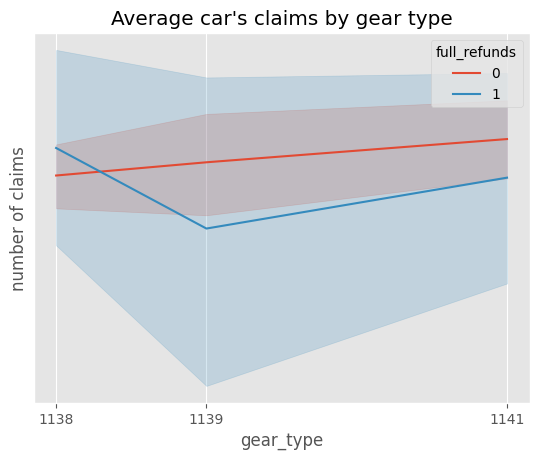

In [21]:
ax=sns.lineplot(x='gear_type',y='claim_number',data=df_details_sales_claims,hue='full_refunds')
ax.set_xticks([1138,1139,1141])
ax.set_yticks([])
plt.title("Car claims by gear type")
plt.ylabel('number of claims');

The number of full refunds issued for the different gear types are not similar meaning that gear type "1138" has a higher numer of "full claims" than the other two gear types.

It would be beneficial for the Auto1 to put special attention on the cars they purchase with gear type "1138" since it presents a high cost for Auto1 in terms of claims.

The other 2 types of gears have more partial refunds relative to full refunds so overall they represent a lower cost for Auto1. this could be due to the fact that for partial refunds Auto1 simply issues a partial refund amount and does not have to repossess the car which implies a great deal of logistics on Auto1 behalf.

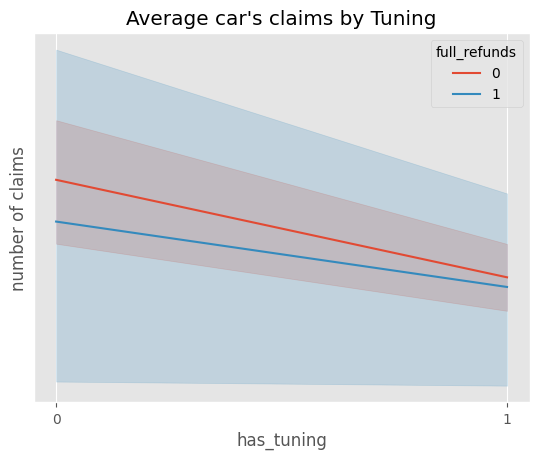

In [24]:
ax=sns.lineplot(x='has_tuning',y='claim_number',data=df_details_sales_claims,hue='full_refunds')
ax.set_xticks([0,1])
ax.set_yticks([])
plt.title("Car claims by Tuning")
plt.ylabel('number of claims');

Similarily the presence of tuning (assuming that tuning implies that the car was mechanically checked for faults before the sale) greatly reduces the number of both types of claims.

when tuning is true the number of full claims is lower relative to the number of partial claims which in the same way as the previous case results in lower logistics costs for auto1 relative to the costs of issuing a full refund.

It would be beneficial to introduce special incentives for customers that sell their cars to Auto1 to incurr in "tuning" before the sale of their car.

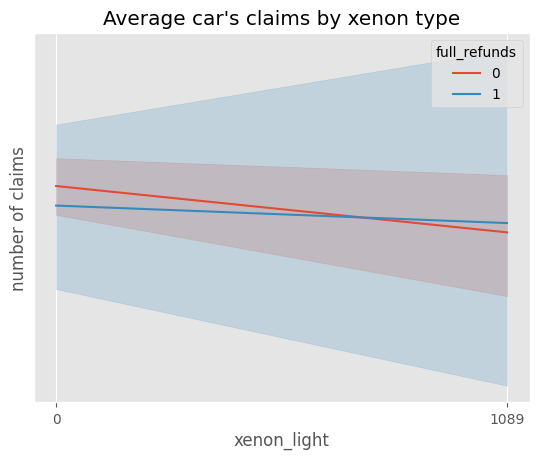

In [27]:
ax=sns.lineplot(x='xenon_light',y='claim_number',data=df_details_sales_claims,hue='full_refunds')
ax.set_xticks([0,1089])
ax.set_yticks([])
plt.title("Car claims by xenon type")
plt.ylabel('number of claims');



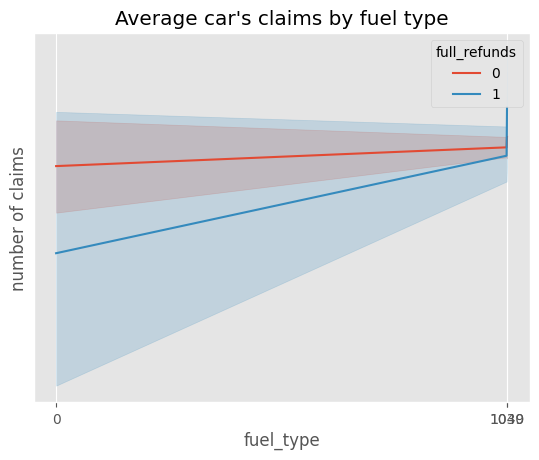

In [29]:
ax=sns.lineplot(x='fuel_type',y='claim_number',data=df_details_sales_claims,hue='full_refunds')
ax.set_xticks([0,1039,1040])
ax.set_yticks([])
plt.title("Car claims by fuel type")
plt.ylabel('number of claims');

I assume that the presence of xenon lights in many cases are an after market purchase and therefore might serve as a proxy for "cars that were modified or tinkered with by the previous owners" this is telling of a car that might cause issues for the future buyer since in many cases after market modifications often result in user induced errors and warranty violations.

We can see in the graph that the presence of Xenon lights greatly induces the number of claims and even more so induces more full refunds relative to partial refunds when it comes to the type "1040"

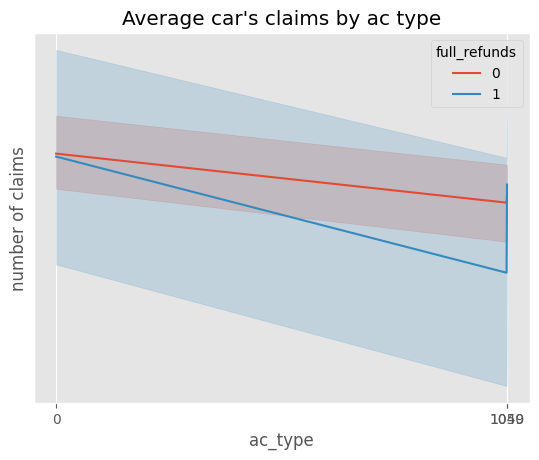

In [33]:
ax=sns.lineplot(x='ac_type',y='claim_number',data=df_details_sales_claims,hue='full_refunds')
ax.set_xticks([0,1049,1050])
ax.set_yticks([])
plt.title("Car claims by ac type")
plt.ylabel('number of claims');

Here we can simply say that Auto1 should focus son the cars with ac type 1050 since this type of AC unit greatly spikes the number of full refunds issued relative to the partial refunds.

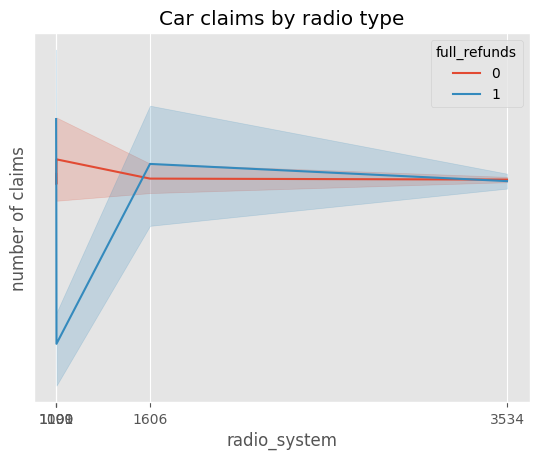

In [37]:
ax=sns.lineplot(x='radio_system',y='claim_number',data=df_details_sales_claims,hue='full_refunds')
ax.set_xticks([1099,1100,1101,1606,3534])
ax.set_yticks([])
plt.title("Car claims by radio type")
plt.ylabel('number of claims');

It would be beneficial to know what the type of radio systems are since they clearly show a strong difference between the number of partial vs full refund made by Auto1.

this could also serve as a proxy for aftermarket modifications and overall state or quality of the car.

# Executive Summary:

Data: We have car level characteristics for the cars that have had claims made on them after purchase by the customer.

We check for relevant car characteristics the number of full vs partial claims in order to find which type of cars induce a greater cost for Auto1 via claims and ultimately the amount of money that has to be refunded aswell as the implied costs that Auto1 has to incurr in when they issue a full refund in which they take once again posession of the vehicle in question.

Insights:
It would be beneficial for Auto1 to focus on more closely inspecting cars with characteristics that were flagged in this short study in order to ensure that the number of issued claims is kept to minimum.





